In [1]:
import pandas as pd
import numpy as np
from helper_functions.clean_transitions import clean_transition_column
from helper_functions.simulate_game import simulate_game
from helper_functions.combine_matrices import combine_team_matrix
import time
from matplotlib import pyplot as plt

In [2]:
#if one team does not have data for a certain starting state, we will get a row of nan's which will break the code.
#if this occurs, we can just substitute the average probability for this row?
avg_matrix = pd.read_excel('avg_transition_matrix_with_manual_edits.xlsx', sheet_name = 'Mean Pasted', index_col='Starting_State')

In [3]:
team_A = pd.read_excel("team_specific_matrix/TCU_A.xlsx", index_col = 'Starting_State')
team_B = pd.read_excel('team_specific_matrix/Baylor_B.xlsx', index_col = 'Starting_State')

In [4]:
transition_matrix = combine_team_matrix(team_A, team_B)

In [5]:
matrix_2 = transition_matrix.copy()

In [8]:
arr = np.array([transition_matrix, matrix_2], dtype=object)

In [6]:
# for r in transition_matrix.index:
#     if all(np.isnan(transition_matrix.loc[r])):
#         print(r)
#         transition_matrix.loc[r]=avg_matrix.loc[r]

In [7]:
abc = simulate_game(transition_matrix, num_games=100, diagnose_time=True)

In [9]:
abc[2].sum()

t1    1.503947
t2    0.022976
t3    0.543004
t4    0.779773
t5    1.131545
dtype: float64

In [9]:
vec_simul = np.vectorize(simulate_game)

In [9]:
totals = []
for item in abc[1]:
    totals.append(item[0]+item[1])

In [10]:
np.mean(totals)

158.19

In [11]:
margins = []
for aaa in abc[1]:
    margins.append(aaa[0]-aaa[1])

(array([ 7.,  6., 10., 10., 15., 12., 13.,  7.,  5.,  0.,  2.,  3.,  0.,
         0.,  1.,  0.]),
 array([-25., -20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.,
         30.,  35.,  40.,  45.,  50.,  55.]),
 <BarContainer object of 16 artists>)

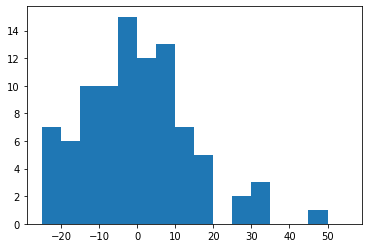

In [12]:
plt.hist(margins, bins=np.linspace(-25,55,17))

In [13]:
np.mean(margins)

-3.75

In [14]:
np.median(margins)

-3.0

In [180]:
pd.Series([x[0]>x[1] for x in abc[1]]).value_counts()

False    62
True     38
Name: count, dtype: int64

In [97]:
abc[1][0]

(84, 59)